

# Project: Investigate a Dataset - Medical no show appointments
 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#question">Question(s) for Analysis</a></li><li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limits">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The data set selected has information about the tendancy for patients to show up or not for a medical appointment after making a booking.

This data set includes information about 110,527 medical appoinments and 14 related variables to those appoinmtments, of which the most important variable being *if the pateint show-up or not-show-up for the appoinment*.

### Data Dictionary

The 14 variables related to the data set is described as follows;

`PatientId` Identification number of a patient

`AppointmentID` Identification number of each appointment

`Gender (Male or Female)` Female is the greater proportion in this dataset

`AppointmentDate` The day of the actuall appointment, when they have to visit the doctor

`ScheduledDate` The day someone called or registered the appointment, this is before appointment

`Age` Age of the patient

`Neighbourhood` Where the appointment takes place

`Scholarship` Details regarding if the pateint recieves the scholarship or not

`Hipertension` Whether the patient suffers from hypertension or not

`Diabetes` Whether the patient suffers from diabetes or not

`Alcoholism` Whether the patient suffers from alcoholism or not

`Handcap` Indicated the level of disability of the patient

`SMS_received` 1 or more messages sent to the patient

`No-show` Whther the pateint showed-up or not-showed-up for the appointment

<a id='question'></a>
### Question(s) for Analysis

The aim of this analysis will be to identify if it could be predicted whether a petient will show-up or not for the appointmnet with the use of the background details provided in the information table.

In this project we try to answer the following questions;

   1. What is the contribute by Age for the pateint to actually show up for the appoinment?
     
   2. What effect does the gender have in predicting if the pateint will actually attend the appointments? And does the scholarship being offered have an effect for those pateints
     
   3. What effect does the wait time (i.e. the gap between the Schedule date and the Appointment date) has on patients actually attending for their appointments?
     
     

The first step in the project will be to load all the packages that are to be used in the project as shown in the cell below.

In [1]:
# packages planned to be used in the project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, the data will be loaded, checked for cleanliness, and then trimmed and cleaned your for analysis. 



In [2]:
# Load the dataset
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')


### General Properties

Let's check what the given dataframe looks like to get an ideas about the data we are working with.


In [3]:
# Print out the top lines of the dataframe
df


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
# Print a concise summary of the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the information we have gathered so far the dataset has 110,527 entries and 14 columns as mentioned above, but none of them have any missing values (no NaN).

In [5]:
# Check for any duplicate entries
sum(df.duplicated())


0

The dataframe does not seem to have any duplicate entries in any of the rows.


### Data Cleaning

Now since we understand the basic structure of our dataframe we can dive into the data cleaning phase


 

We go by correcting inconsistenceis for the dataframe



1. Correct typos in the column names 

There is a spelling mistake noted in one of the column name and it would be better to present the names changed from DAY to DATE. These chnage are performed using the `rename()` function and `inplace=True` to edit in the original dataframe itself.
    

In [6]:
# Table column name changes
df.rename(columns={"ScheduledDay":"ScheduledDate", 
                   "AppointmentDay":"AppointmentDate", 
                   "Hipertension":"Hypertension", 
                   "No-show":"No_Show"}, inplace=True)


2. Remove the TimeStamp in ScheduledDate and AppointmentDate

The information in the `ScheduledDate` and `AppointmentDate` are simplified by converting to only the date without the time in this field.

It would have been interesting to have information about the time of the appoinment to get a better understanding if that had an impact on the show/no-show result, but unfortunately that information is not available for the dataset. And we will also remove the TimeStamp in ScheduledDate to be consistent. We define a function to remove the timestamp as follows.

In [7]:
def drop_timestamp(df,split_columns):
    # Apply split function to each column of the dataframe 
    for c in split_columns:
        df[c] = df[c].apply(lambda x: x.split("T")[0])

Then we call the function to remove the timestamp.

In [8]:
# Convert ScheduledDate and AppointmentDate to only the date without time

# Columns to split by "T"
split_columns = ['ScheduledDate', 'AppointmentDate']

# Call function to drop the timestamp
drop_timestamp(df,split_columns)

# Print dataset to check updates
df.head()
       

,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


3. Change PatientId data type to `int`

Presently `PatientId` is stored as `float` data, but the indices are numbers without decimals and should be able to be stored as `int`.

In [9]:
# Change PatienId data type to int
df['PatientId'] = df['PatientId'].astype("int")


    
4. Change ScheduledDay and AppointmentDay to `DateTime` format

For easy manipulation of date/time entries and to enable functionalities in the date/time objects the data type in the above two columns are changed to `DateTime` format using `.to_datetime()`.


In [10]:
# Change ScheduledDate and AppointmentDate data type to datetime
df['ScheduledDate'] = pd.to_datetime(df['ScheduledDate'])
df['AppointmentDate'] = pd.to_datetime(df['AppointmentDate'])


Now the dataframe will look as follows;

In [11]:
# Print the top 2 enties of the dataset
df.head(2)


,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No


Let's have a in-depth look at our data file

In [12]:
# Generate descriptive statistics of the dataframe
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From this data we see that there is a outlier in the `Age` data as the minimum recorded is '-1'. Therefore, we will find the corresponding records and delete it as we do not have the knowledge to correct the record 

In [13]:
# To find the records where age is recorded below 0
df_age_out = df.query('Age < 0')
df_age_out


,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [14]:
# Delet the corresponding record from the dataset
df.drop(index=99832, inplace=True)     


Let's again check the minimum age reported in the Age column for the dataframe after cleaning.

In [15]:
# Get the minimum entry of the Age column
df["Age"].min()


0

Let's try to optimize the data types for each field. The `nunique()` function is used to find the number of unique entires for each column and accordingly we can decide how to proceed with the data type changes. 

In [16]:
# Display the number of unique entries for each column
df.nunique()


PatientId           62298
AppointmentID      110526
Gender                  2
ScheduledDate         111
AppointmentDate        27
Age                   103
Neighbourhood          81
Scholarship             2
Hypertension            2
Diabetes                2
Alcoholism              2
Handcap                 5
SMS_received            2
No_Show                 2
dtype: int64

According to the properties shown above, most of the datafield can be chnaged to `int8` in order to optimize data useage.

In [17]:
# Data Type Optimization

# Change data types using .astype()
df["Age"] = df["Age"].astype("int8")
df["Scholarship"] = df["Scholarship"].astype("int8")
df["Hypertension"] = df["Hypertension"].astype("int8")
df["Diabetes"] = df["Diabetes"].astype("int8")
df["Alcoholism"] = df["Alcoholism"].astype("int8")
df["Handcap"] = df["Handcap"].astype("int8")
df["SMS_received"] = df["SMS_received"].astype("int8")
df["Gender"] = df["Gender"].astype("category")
df["No_Show"] = df["No_Show"].astype("category")


In [18]:
# Display the latest summary of the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   PatientId        110526 non-null  int64         
 1   AppointmentID    110526 non-null  int64         
 2   Gender           110526 non-null  category      
 3   ScheduledDate    110526 non-null  datetime64[ns]
 4   AppointmentDate  110526 non-null  datetime64[ns]
 5   Age              110526 non-null  int8          
 6   Neighbourhood    110526 non-null  object        
 7   Scholarship      110526 non-null  int8          
 8   Hypertension     110526 non-null  int8          
 9   Diabetes         110526 non-null  int8          
 10  Alcoholism       110526 non-null  int8          
 11  Handcap          110526 non-null  int8          
 12  SMS_received     110526 non-null  int8          
 13  No_Show          110526 non-null  category      
dtypes: category(2), date

Due to the data type optimization we have reduced the momeory usage initially from 11.8+MB to 6.0+ MB now.


<a id='eda'></a>
## Exploratory Data Analysis


Once we have trimmed and cleaned our data, we can move into the explotation stage.


In [19]:
#group by patientID

df_patient = df.groupby('PatientId')
df_patient.head()

,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3596266328735,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [20]:
#df_patient.describe()

In [21]:
#regulars = df_patient['count'] > 1
#regulars.head()

In the attempt to find answer to our first question with regard to age of the pateints, we will graphically present the distributuion of age for all the patients in our dataset as follows.

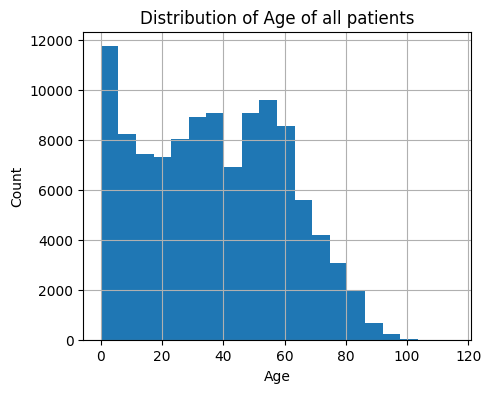

In [22]:
# Plot histogram for Age vs Count
ax1 = df['Age'].hist(bins=20, figsize=(5, 4))

#Label the subplot with titles and a legend
ax1.set_title('Distribution of Age of all patients')
ax1.set_xlabel('Age');
ax1.set_ylabel('Count');

We have performed a Univariate variable (1D) exploration in this section. According to the above graph it is seen that most of the patients visiting the clinic is approximately around ages 0-5, 30-40 and 45-55. In addition the number of patients attending the clinic at older ages (>80) are much less compared to other younger ages. The number of older pateints show a decline after 65 years.  

To find answers for 1st question we raised initially we need to find connections in the data set related to age and patient behaviour. Therefore, we plot the distribution of age of all the patients in the dataframe and their response for the appointment (2D multiple variable exploration). 

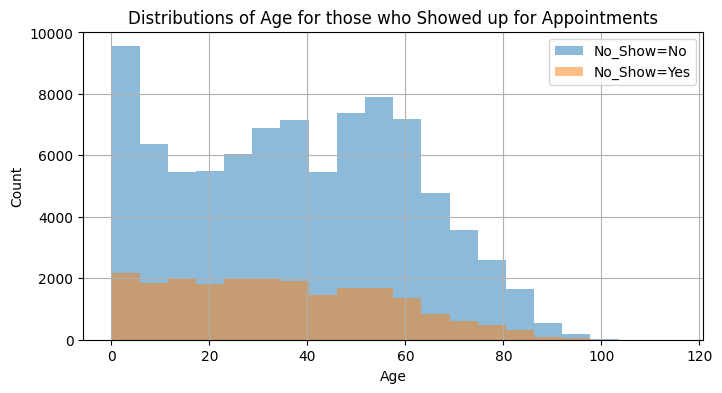

In [23]:
# Filter rows where 'No-show' is 'No' 
show = df['No_Show'] == 'No'

# Filter rows where 'No-show' is 'Yes' 
noShow = df['No_Show'] == 'Yes'

# Plot histogram for Age vs Count
ax = df[show]['Age'].hist(bins=20, 
                          alpha=0.5, 
                          figsize=(8, 4), 
                          label='No_Show=No');

# Layer a new histogram using the same subplot that was returned as 'ax'
df[noShow]['Age'].hist(bins=20, 
                       alpha=0.5, 
                       figsize=(8, 4), 
                       label='No_Show=Yes', 
                       ax=ax);

# Label the subplot with titles and a legend
ax.set_title('Distributions of Age for those who Showed up for Appointments')
ax.set_xlabel('Age');
ax.set_ylabel('Count');
ax.legend(loc='upper right');

When we explored the patients' attendance to the scheduled appointments we see that patients in the age groups 10-25 and 40-45 show up very less compared to other age groups. 

In [24]:
#stacked_data = df.apply(lambda x: x*100/sum(x), axis=1)


Before proceding to the next sections let's have a look at the dataframe.

In [25]:
# Print the first few rows of the dataframe
df.head()


,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Next we difine sub arrays to get a better understanding about patients 

In [26]:
# Define new arrays
Schol = df['Scholarship'] == 1
Hypertension = df['Hypertension'] == 1
Diabetes = df['Diabetes'] == 1
Female = df['Gender'] == "F"


We go deep into analysing the patients who are recieving the scholarship.

In [27]:
# Load the first few lines of the array containing pateints with the scholarship
df[Schol].head()


,PatientId,AppointmentID,Gender,ScheduledDate,AppointmentDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show
12,566654781423437,5634718,F,2016-04-28,2016-04-29,22,NOVA PALESTINA,1,0,0,0,0,0,No
17,14794966191172,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes
18,17135378245248,5621836,F,2016-04-26,2016-04-29,30,NOVA PALESTINA,1,0,0,0,0,1,No
31,311284853849,5628907,M,2016-04-27,2016-04-29,12,NOVA PALESTINA,1,0,0,0,0,0,Yes
33,7653516999712,5616921,F,2016-04-25,2016-04-29,38,SÃO CRISTÓVÃO,1,0,0,0,0,1,No


Let's see how the gender and the scholarship affects the attending the medical appointments. We first look at the percentage of female and males attending the appointments separately, and then investigate if the attendace change if they have recieved the scholarship.

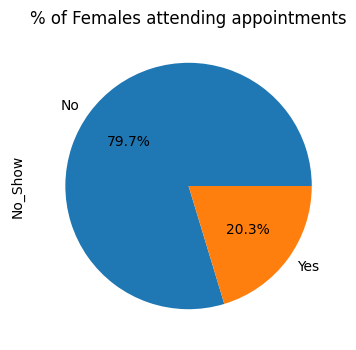

In [28]:
# Pie chart of females attending appointments
df[Female]['No_Show'].value_counts().plot(
                kind='pie', 
                title="% of Females attending appointments", 
                figsize=(4, 4), 
                autopct='%1.1f%%');


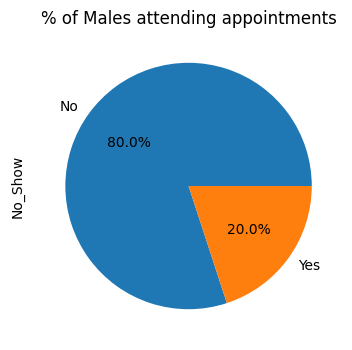

In [29]:
# Pie chart of males attending appointments
df[df['Gender'] == "M"]['No_Show'].value_counts().plot(
                kind='pie', title="% of Males attending appointments", 
                figsize=(4, 4), 
                autopct='%1.1f%%',);


In order to analyse what effect the scholarship has on making for the appointment for the pateints, we extract the gender and No_show information for the patients recieving the scholarship.

In [30]:
# Define a new dataframe with these information 
df_genders = pd.crosstab(df[Schol]["No_Show"], df[Schol]["Gender"])
df_genders


Gender,F,M
No_Show,,
No,6747,1536
Yes,2106,472


Next we graph the results in the above table as a pie chart to visualize as below.

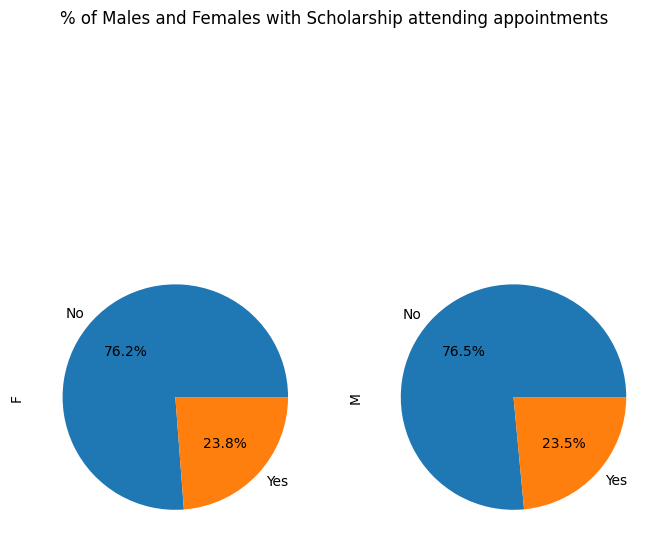

In [31]:
# Pie chart of females and male with the scholarship attending appointments
df_genders.plot.pie(title="% of Males and Females with Scholarship attending appointments", 
                    figsize=(8, 8), 
                    autopct='%1.1f%%',
                    legend=False,
                    subplots=True);


In essence, it can be said that both males and females show the same tendancy to show up or not for the appointmnets. But countwise there are more females scheduling and attending the medical appointments. From the above constructed pie charts it is possible to see that the scholarship has a negative influence of both males and felames to attend the scheduled appointments, since the percentages reduce with having a scholarship.

Then we look at what effect the wait time between the schedule date and the appointment date has on pateints actually attending the appointments. We define a new column as `Wait_time` to find the gap between the two dates.

In [32]:
# Extract only the ScheduledDate AppointmentDate and No_Show columns from the dataframe
df_date = df.loc[:,["ScheduledDate","AppointmentDate","No_Show"]]

# Calculate Wait_time
df_date["Wait_time"] = df["AppointmentDate"] - df["ScheduledDate"]


In [33]:
# Display the first few lines for df_date
df_date.head()


,ScheduledDate,AppointmentDate,No_Show,Wait_time
0,2016-04-29,2016-04-29,No,0 days
1,2016-04-29,2016-04-29,No,0 days
2,2016-04-29,2016-04-29,No,0 days
3,2016-04-29,2016-04-29,No,0 days
4,2016-04-29,2016-04-29,No,0 days


For the analysis we will only need information regarding No_show and Wait_time. Therefore, we eliminate the rest of the columns. 

In [34]:
# Drop the ScheduledDate and AppointmentDate 
df_date.drop(['ScheduledDate', 'AppointmentDate'], axis=1, inplace=True)


To get an idea about the distribution of Wait_time we arrange the df_date dataframe in ascending order with the cummulative counts.

In [35]:
# Arrange the dataframe according to the Wait_time
df_wait_time = df_date.groupby('Wait_time').count()
df_wait_time.head()

,No_Show
Wait_time,
-6 days,1
-1 days,4
0 days,38562
1 days,5213
2 days,6725


The Wait_time always has to be a positive value. Therefore, we need to remove the entries which have a negative value. First we extract the raws which have a negative entry for Wait_time, and then we drop those raws.

In [36]:
# Get entries with negative value for Wait_time
df_date.query('Wait_time < "0 days"')
#df_wait_time.query('Wait_time < "0 days"')

,No_Show,Wait_time
27033,Yes,-1 days
55226,Yes,-1 days
64175,Yes,-1 days
71533,Yes,-6 days
72362,Yes,-1 days


In [37]:
# Drop the entries reported above
df_date.drop([27033,55226,64175,71533,72362], axis=0, inplace=True)  


In [38]:
# Check if all Wait_time with negative values are removed
df_date.query('Wait_time < "0 days"')


,No_Show,Wait_time


We have confirmed that, there are no more entries with negative values for Wait_time

In [39]:
# Load the first few lines of df_date
df_date.head(2)


,No_Show,Wait_time
0,No,0 days
1,No,0 days


In [40]:
# Arrange the data using groupby Wait time 
ax1 = df_date.groupby('Wait_time').count().reset_index()

#Display ax1
ax1.head(5)


,Wait_time,No_Show
0,0 days,38562
1,1 days,5213
2,2 days,6725
3,3 days,2737
4,4 days,5290


This information is arraged into a new dataframe df_date_gap as below.


In [41]:
# Compute a simple cross tabulation of Wait_time and No_Show
df_date_gap = pd.crosstab(df_date["Wait_time"], df_date["No_Show"])

# Display the new dataframe
df_date_gap


No_Show,No,Yes
Wait_time,,
0 days,36770,1792
1 days,4100,1113
2 days,5123,1602
3 days,2093,644
4 days,4059,1231
...,...,...
155 days,4,6
162 days,9,2
169 days,7,1


Next we will plot this information and try to analyse.

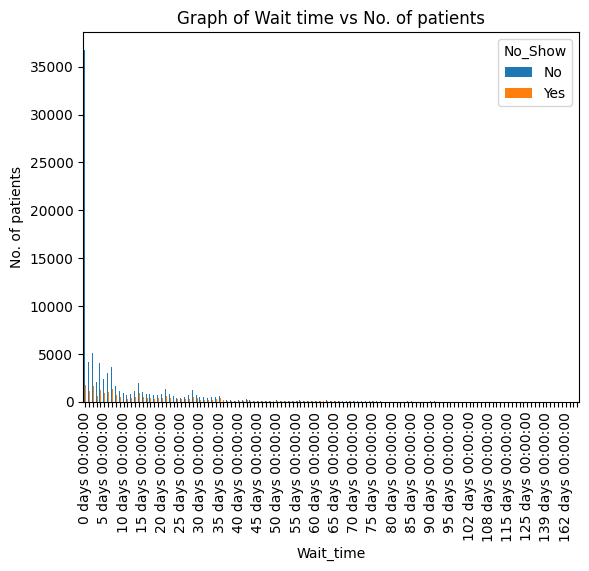

In [42]:
# Plot a bar graph 
barplot=df_date_gap.plot.bar()

# To display x ticks for selected x value labels
barplot.set_xticklabels([t if not i%5 else "" for i,t in enumerate(barplot.get_xticklabels())]);

# Edit the graph labels
barplot.set_ylabel('No. of patients')
barplot.set_title('Graph of Wait time vs No. of patients');

From the above bar graph, it can be seen that countwise most of the patients attend for the appointments within the first 10 days, and even reduces after the wait time is more than 35 days. We can select the top 35 days wait time periods where the patients reported as follows.

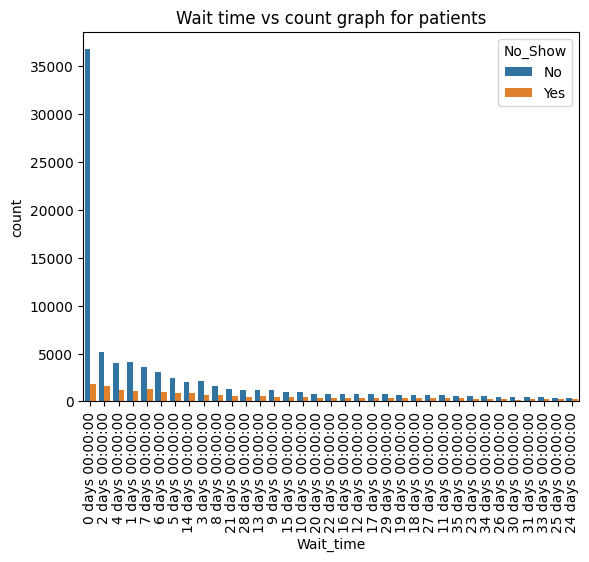

In [43]:
# select the data for the first 35 days wait time
sns.countplot(x=df_date.Wait_time, 
              hue=df_date.No_Show, 
              order=df_date.Wait_time.value_counts().iloc[:35].index
             )

plt.xticks(rotation=90)
plt.title('Wait time vs count graph for patients');

In ana anlysis as this it is important to consider the actual number of patients to show/no-show as well as the percentage values. Considering both theses parameters will give us a better understanding about the scenario rather than taking only one aspect into consideration. Therefore, we try to get both those values together to do an indept analysis next.

When we consider the percentage of attending appointments according the wait time our results will be as follows.

In [44]:
# Select and print the highest pecentage of attendace with reference to wait time
df_date_gap2 = pd.crosstab(df_date["Wait_time"], df_date["No_Show"], normalize="index")
df_date_gap2 = df_date_gap2.sort_values(by='No', ascending=False)

# Display the dataframe
df_date_gap2

No_Show,No,Yes
Wait_time,,
109 days,1.0,0.0
97 days,1.0,0.0
105 days,1.0,0.0
107 days,1.0,0.0
108 days,1.0,0.0
...,...,...
139 days,0.0,1.0
146 days,0.0,1.0
151 days,0.0,1.0


In order for us to understand the table column names better we change the table headers to *percent*.

In [45]:
# Rename the column to indicate percentage values
df_date_gap2.rename(columns={"No":"Percent_No",  
                             "Yes":"Percent_Yes"}, 
                             inplace=True)
# view to check names
df_date_gap2.head(2)

No_Show,Percent_No,Percent_Yes
Wait_time,,
109 days,1.0,0.0
97 days,1.0,0.0


Afterwards we join the table with the percentage values to the table with the actual numbers to analyse the wait time side by side.

In [46]:
# merge datasets
df_gap_combined = df_date_gap2.merge(df_date_gap, 
                                     left_on='Wait_time', 
                                     right_on='Wait_time', 
                                     how='left')


In [47]:
# view to check merge
df_gap_combined.head()


No_Show,Percent_No,Percent_Yes,No,Yes
Wait_time,,,,
109 days,1.0,0.0,5,0
97 days,1.0,0.0,2,0
105 days,1.0,0.0,4,0
107 days,1.0,0.0,2,0
108 days,1.0,0.0,5,0


For us to easily manipulate the data we take the index of the table to a separate column using the `.reset_index()` as follows.

In [48]:
# Set a new column using the index
df_gap_combined = df_gap_combined.reset_index()


In [49]:
# Display the first 20 rows of the dataframe
df_gap_combined.head(20)


No_Show,Wait_time,Percent_No,Percent_Yes,No,Yes
0,109 days,1.000000,0.000000,5,0
1,97 days,1.000000,0.000000,2,0
2,105 days,1.000000,0.000000,4,0
3,107 days,1.000000,0.000000,2,0
4,108 days,1.000000,0.000000,5,0
5,82 days,1.000000,0.000000,1,0
6,94 days,1.000000,0.000000,2,0
7,112 days,1.000000,0.000000,5,0
8,115 days,1.000000,0.000000,2,0
9,117 days,1.000000,0.000000,1,0


Above table is arranged in descending order according to the values in the `Percent_No` column. For our analysis, we change the order so that it is arranged in decsending order according to the `No` column as follows.

In [50]:
# Arrange table in descending order for No column
df_gap_combined.sort_values(by="No", ascending=False).head(20)

No_Show,Wait_time,Percent_No,Percent_Yes,No,Yes
18,0 days,0.953529,0.046471,36770,1792
36,2 days,0.761784,0.238216,5123,1602
28,1 days,0.786495,0.213505,4100,1113
34,4 days,0.767297,0.232703,4059,1231
46,7 days,0.733184,0.266816,3597,1309
38,6 days,0.752044,0.247956,3036,1001
45,5 days,0.733903,0.266097,2405,872
35,3 days,0.764706,0.235294,2093,644
68,14 days,0.686577,0.313423,2000,913
49,8 days,0.712693,0.287307,1662,670


Hence, from the above table it is clear that majority of the patients have a wait time less than 10 days between the schedule date and the appointment date. The show up for the appointment is very high (95.3%) when the wait time is just 1 day for the patients.

##  Results

### Research Question 1 
### What is the contribute by Age for the pateint to actually show up for the appoinment?

According to the "Distributions of Age for those who Showed up for Appointments" graph we constructed it can be seen that patients who are in the age categories 0-10 and 40-50 shows the best positive response in attending for their sceduled appointments.

Patients who are in the age categories 10-20 and above 70 end up mostly not showing up for their appointments.


### Research Question 2  

### What effect does the gender have in predicting if the pateint will actually attend the appointments? And does the scholarship being offered have an effect for those pateints

From the constructed first two pie charts ("% of Females attending appointments"" and "% of Males attending appointments") we can see that the gender does not have much of an effect for showing up for scheduled appointments when considered percentagewise. Both males and females show up approximately 80% from the scheduled appointments. However, when the actual numbers are considered females schedule more appointments than males and at the same time attends more for those appoitments.

Next when the reciept of the scholarship was also considered for these males and females, we see a decline in the percentage of attendess for the scheduled appointments. Therefore a negattive correlation with recieving a scholarship.


### Research Question 3  

### What effect does the wait time (i.e. the gap between the Schedule date and the Appointment date) has on patients actually attending for their appointments?

According to the last two graphs constructed, we can see that when the gap between the schedule date and the appointment, i.e. the wait time is less than 7 the maximum number of patients will be coming in for the appoontments. 

But when the actual number of pateients are considered, the total positive resnposes are reducing as the gap days are increasing. However, there are some entries where the percentage is 100% or almost close to 100% in some later days but the number count is very low compared to the first few days.

The summarised result is as follows;

| Wait time (Days) | No. of pateints attending  | % Attending |
|:--------:|:------------------------:  |:-----------:|
|  0       |  36770          |  95.35      |
|  1       |  4100           |  78.65      |
|  2       |  5123           |  76.18      |
|  3       |  2093           |  76.47      |
|  4       |  4059           |  76.72      |
|  108     |  5              |  100.00     |
|  109     |  5              |  100.00     |
|  112     |  5              |  100.00     |
|  105     |  4              |  100.00     |




<a id='conclusions'></a>
## Conclusions

From our analysis is it seen that patients in. the age categories 0-10 and 40-50 will have a higher percentage of keeping up with their scheduled appointments, and those who are in the 10-20 and above 70 categories tend to not show up for the scheduled appointments. But since only the actual numbers are considerde for the analysis more investigations need to be done to check their percentage values to get a better understanding.

Being female or male does not have a clear contribution to check if a pateint will tend to attend the scheduled appoitnment. And recieving the scholarship actually will mean there might actually lessen the possibility of showing up for the appointment.

Most pateints will be showing up for their appointmnets when the wait time between the schedule date and the appointment date is less (0-4 days), and when the gap is increased the number of appointments placed as well the possibility of patients coming for the appointmnets are reduced. However, in some instance when the wait time is more even when the number of appointmnets are quite few the patients will show a 100% positive response for their appointments.






<a id='limits'></a>
### Limitations

In this analysis these were 2 instances (age<0 and wait time <0) where we had to delete some entries because there were no additional information to correct these entries. Eventhough the effect might be minor due to the size of the data set there could have been some effect for our analysis due to these eliminations.

remove timestamp
In analysing the schedule time and the appointmnet time, we had time details for the scheduled time but all entries in the appointment date had 00.00 for time. Hence, we don not have details regarding the time of the appointment. The time of the appointment could have a great influence on the patients actually showing up for the appointments or not. For our convienience in analysis we removed the timestamp in both these catagories.  




## Submitting your Project 

In [52]:
#Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 659260 bytes to Investigate_a_Dataset.html
